In [6]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns

In [7]:

df_train_identity = pd.read_csv('train_identity.csv')
df_train_transaction = pd.read_csv('train_transaction.csv')

In [8]:
train_merged=pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')

In [9]:
merged_Device = train_merged[['DeviceType', 'DeviceInfo', 'isFraud']]
merged_Device


,DeviceType,DeviceInfo,isFraud
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,mobile,SAMSUNG SM-G892A Build/NRD90M,0
...,...,...,...
590535,NaN,NaN,0
590536,NaN,NaN,0
590537,NaN,NaN,0
590538,NaN,NaN,0


In [10]:
def move_to_others(df, column, threshold):
    value_counts = df[column].value_counts()
    others = value_counts[value_counts < threshold].index
    df[column] = df[column].replace(others, 'others')
    return df
move_to_others(merged_Device, 'DeviceInfo', 400)

C:\Users\USER\AppData\Local\Temp\ipykernel_700\277935495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(others, 'others')


,DeviceType,DeviceInfo,isFraud
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,mobile,others,0
...,...,...,...
590535,NaN,NaN,0
590536,NaN,NaN,0
590537,NaN,NaN,0
590538,NaN,NaN,0


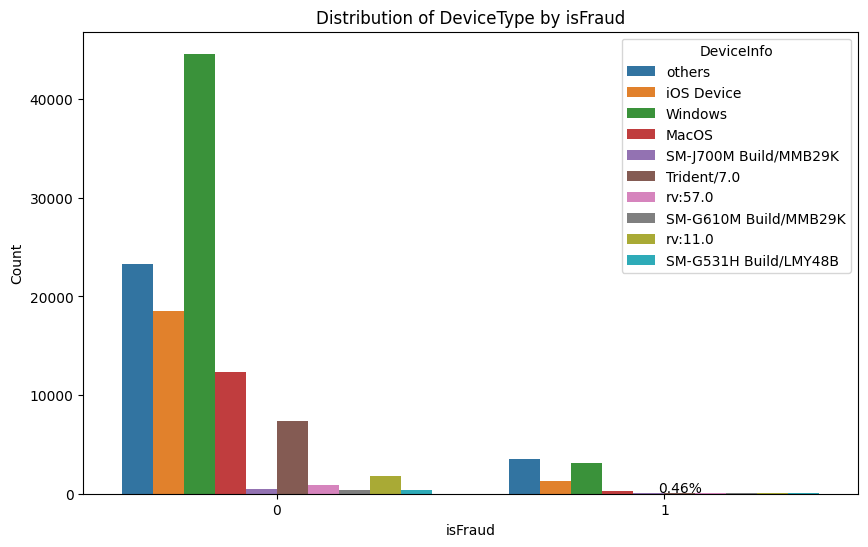

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_Device, x='isFraud', hue='DeviceInfo')
plt.title('Distribution of DeviceType by isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')

# Calculate the total count for each value of isFraud
total_0 = len(merged_Device[merged_Device['isFraud'] == 0])
total_1 = len(merged_Device[merged_Device['isFraud'] == 1])

# Add percentages on top of the bars for isFraud = 0
for p in ax.patches:
    if p.get_height() > 0:
        if p.get_x() == 0:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_0*100:.2f}%', ha='center')

# Add percentages on top of the bars for isFraud = 1
for p in ax.patches:
    if p.get_height() > 0:
        if p.get_x() == 1:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_1*100:.2f}%', ha='center')

plt.show()

In [19]:
# Calculate the count of DeviceInfo values where isFraud is 0
count_0 = merged_Device[merged_Device['isFraud'] == 0]['DeviceInfo'].value_counts()

# Calculate the count of DeviceInfo values where isFraud is 1
count_1 = merged_Device[merged_Device['isFraud'] == 1]['DeviceInfo'].value_counts()

# Calculate the percentage of isFraud = 1 for each DeviceInfo value
percentage = (count_1 / (count_0 + count_1)) * 100

# Print the result with '%' symbol
print(percentage.apply(lambda x: f"{x:.2f}%"))

DeviceInfo
MacOS                     2.21%
SM-G531H Build/LMY48B     8.05%
SM-G610M Build/MMB29K     8.03%
SM-J700M Build/MMB29K    10.93%
Trident/7.0               1.29%
Windows                   6.54%
iOS Device                6.27%
others                   13.26%
rv:11.0                   4.00%
rv:57.0                  10.71%
Name: count, dtype: object


In [20]:
train_merged['V307']

0          117.000000
1            0.000000
2            0.000000
3         1758.000000
4            0.000000
             ...     
590535      47.950001
590536       0.000000
590537       0.000000
590538    2903.500000
590539     279.950012
Name: V307, Length: 590540, dtype: float64